# Improving access to hospital services with data science


The following model is proposed to improve operational efficiency in Ontario hospitals through the improved use of data collected in hospital and governmental databases. This model aims to determine if a patient will require admission to an inpatient bed based on their presentation to the hospital’s Emergency Department (ED). 

In [2]:
#Importing the basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Impoting the dataset
data = pd.read_excel('project_data.xlsx')

#Visualising the column names of the dataset
data.columns

Index(['Patient Number', 'Admitted to IP \n(Yes/No)', 'ED Visit Site',
       ' Visit Type', 'Gender', 'Age', 'Admit by Ambulance', 'CTAS Level',
       'Main Problem  Des', 'Patient has PMH Visit within 3 month',
       'Presenting Complaint'],
      dtype='object')

In [4]:
#Selecting the columns of interest
data = data[['Admitted to IP \n(Yes/No)', 'ED Visit Site','Gender', 'Age','Admit by Ambulance', 'CTAS Level','Presenting Complaint','Patient has PMH Visit within 3 month']]
data['Admit by Ambulance'] = data['Admit by Ambulance'].replace({'G':'Ambulance'})

#Visualising the first few rows of the dataset
data.head()

,Admitted to IP (Yes/No),ED Visit Site,Gender,Age,Admit by Ambulance,CTAS Level,Presenting Complaint,Patient has PMH Visit within 3 month
0,No,TWH,M,37.453799,No Ambulance,4.0,NaN,No
1,No,TGH,F,45.612594,No Ambulance,3.0,NaN,No
2,Yes,TGH,F,79.129363,Ambulance,2.0,NaN,No
3,No,TGH,F,18.986995,No Ambulance,3.0,NaN,No
4,No,TGH,F,58.527036,No Ambulance,2.0,NaN,No


# CLEANING THE DATA

In [5]:
#Value counts of the gender column
data['Gender'].value_counts()

M    272327
F    268331
U       126
O        25
Name: Gender, dtype: int64

Since the number of people in the unidentified and other category are very low , we drop the rows corresponding to these categories of gender

In [7]:
#Filtering out the unidentified and other category
data = data[data['Gender']!='U']
data = data[data['Gender']!='O']

#Once again checking the value_counts
data['Gender'].value_counts()

M    272327
F    268331
Name: Gender, dtype: int64

In [8]:
#Value counts of the CTAS level
data['CTAS Level'].value_counts()

3.0    292988
2.0    138956
4.0     85278
5.0      6939
1.0      5599
9.0        43
Name: CTAS Level, dtype: int64

We drop the CTAS level 9 as they are values entered by error

In [9]:
#Filtering out CTAS level 9
data= data[data['CTAS Level']!=9]

#Once again checking the value counts
data['CTAS Level'].value_counts()

3.0    292988
2.0    138956
4.0     85278
5.0      6939
1.0      5599
Name: CTAS Level, dtype: int64

In [10]:
# Value counts of the admission type
data['Admit by Ambulance'].value_counts()

No Ambulance    404277
Ambulance       136321
C                   15
A                    2
Name: Admit by Ambulance, dtype: int64

Once again we remove the categories with a very low number

In [11]:
#Filtering out the C and A categories
data = data[data['Admit by Ambulance']!='C']
data = data[data['Admit by Ambulance']!='A']

#Once again checking the value counts
data['Admit by Ambulance'].value_counts()

No Ambulance    404277
Ambulance       136321
Name: Admit by Ambulance, dtype: int64

In [12]:
#We remove age values which are greater than 110 and less than 0
data = data[data['Age']<=110]
data = data[data['Age']>0]

#rounding the age column
data['Age']= data['Age'].apply(round)

In [13]:
#Creating a new admitted Column
def converter(col):
    if col=='Yes':
        return (1)
    else:
        return (0)
data['admitted']=data['Admitted to IP \n(Yes/No)'].apply(converter)

#Creating a new pmh_visits Column
def convert(col1):
    if col1=='Yes':
        return (1)
    else:
        return (0)
data['pmh']=data['Patient has PMH Visit within 3 month'].apply(convert)

#Creating Age intervals
def age_interval(val):
    if (val>0 and val<=75):
        return ('below75')
    else:
        return ('above75')
data['age_Interval']=data['Age'].apply(age_interval)

# Exploratory Analysis & Visualizations

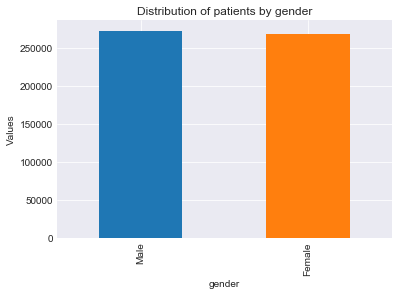

In [14]:
#Visualising the value counts of Gender
sns.set_style(style = 'darkgrid')
ax=data.Gender.value_counts().plot(kind='bar', title='Distribution of patients by gender')
ax.set(xlabel='gender', ylabel='Values')
ax.set_xticklabels( ('Male','Female') )
plt.show()

We see that there are a similar number of males and females

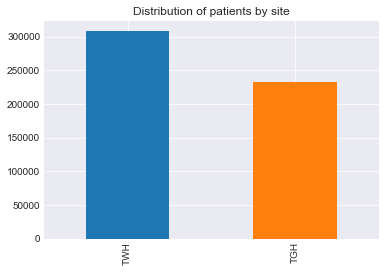

In [15]:
#Visualising the value counts of the Site
data['ED Visit Site'].value_counts().plot(kind='bar', title='Distribution of patients by site')
plt.show()

We see that the there were more number of visits to the TWH site

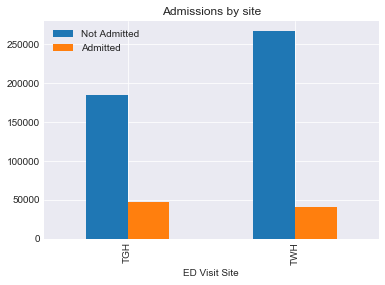

In [16]:
#Visualising admissions by the site
pivot_in_1 = data[['ED Visit Site' , 'admitted']]
pivot1 =pivot_in_1.pivot_table(aggfunc=len , index = 'ED Visit Site' , columns = 'admitted' ).plot(kind = 'bar', title='Admissions by site')
my_labels=['Not Admitted','Admitted']
plt.legend(labels=my_labels)

plt.show()

It is seen that the number of admits in both the sites are low

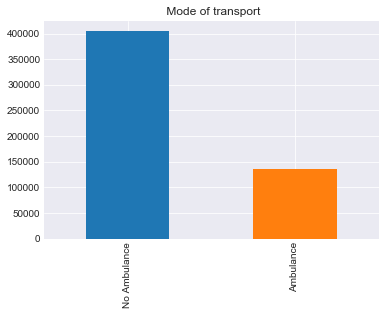

In [17]:
#Visualising the value counts of  mode of transport
data['Admit by Ambulance'].value_counts().plot(kind='bar', title=' Mode of transport')
plt.show()

It is seen that the number of arrivals through ambulance was much lower

CTAS: Canadian Triage & Acuity Scale


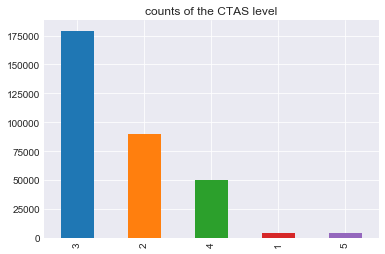

In [114]:
print('CTAS: Canadian Triage & Acuity Scale')

#Visualising the value counts of the CTAS level
mx = data['CTAS Level'].value_counts().plot(kind='bar', title= 'counts of the CTAS level')
mx.set_xticklabels( (3,2,4,1,5) )
plt.show()

We see that there were a high number of level 3 cases and a low number of level 5 cases


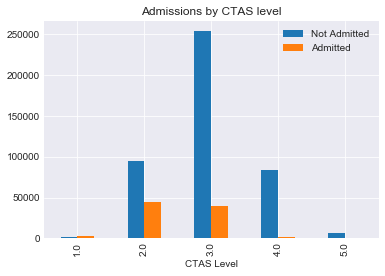

In [19]:
#Visualising admissions by CTAS level
pivot_in_2 = data[['CTAS Level' , 'admitted']]
pivot2 =pivot_in_2.pivot_table(aggfunc=len , index = 'CTAS Level' , columns = 'admitted' )
pivot2.plot(kind = 'bar', title= 'Admissions by CTAS level')
plt.legend(labels=my_labels)

plt.show()

In [20]:
pivot2

admitted,0,1
CTAS Level,,
1.0,2159,3384
2.0,94796,43965
3.0,253295,39567
4.0,83934,1335
5.0,6895,43


It is seen that for CTAS level 1 alone there were more number of admissions in comparison to rejections. For level 5 the number of admissions was very low compared to the rejections

# DATA PREPROCESSING 

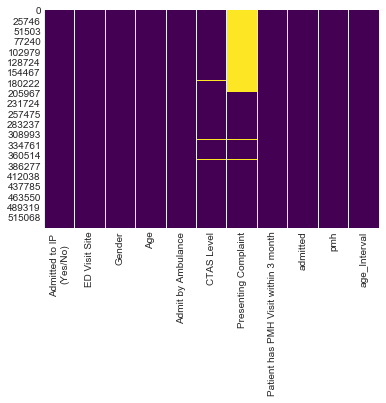

In [21]:
#visualising the missing values
sns.heatmap(data.isnull() , cbar = False , annot=False , cmap = 'viridis')
plt.show()

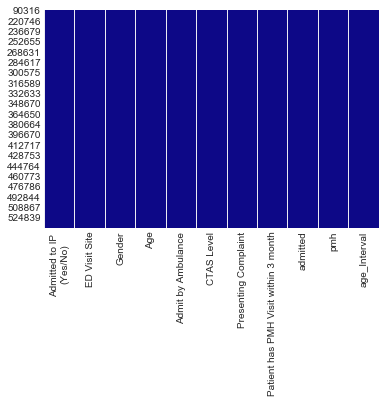

In [112]:
#Dropping rows with missing values
data = data.dropna()

#Once again visualising the missing values
sns.heatmap(data.isnull() , cbar = False , annot=False , cmap = 'plasma')
plt.show()

We see that all the missing values have been removed

Note: As a part of background study of the input data, we tried using various combinations of inputs as features of our prediction model. Following section indicates the final feature inputs we have used in the model. These were finalized only after performing feature engineering with some more features like previous re-admission, previous ED visits and age as category data etc. The final features were selected based on their impact model performace and accuracy of the model.

In [106]:
#Setting the targets and inputs
targets = np.array(data['admitted'])
inputs = np.array(data[['Gender', 'age_Interval', 'Admit by Ambulance', 'CTAS Level',
       'Presenting Complaint','pmh']])

#Balancing the dataset
num_one_targets = int(np.sum(targets))
zero_counter = 0
removed_indices = []
for i in range(targets.shape[0]):
    if targets[i]==0:
        zero_counter +=1
        if zero_counter>num_one_targets:
            removed_indices.append(i)
final_targets = np.delete(targets,removed_indices , axis = 0)
final_inputs = np.delete(inputs,removed_indices , axis = 0)

#The final targets and inputs of the balanced dataset
ftarget = pd.DataFrame(final_targets , columns = ['label'] )
finputs = pd.DataFrame(final_inputs , columns = ['Gender', 'age_Interval', 'Admit by Ambulance', 'CTAS Level',
       'Presenting Complaint','pmh'])

#Checking the shapes
print(ftarget.shape)
print(finputs.shape)

In [109]:
#Getting dummy variables for columns with categorical data
gender = pd.get_dummies(finputs['Gender'])
transport = pd.get_dummies(finputs['Admit by Ambulance'])
ctas = pd.get_dummies(finputs['CTAS Level'])
age = pd.get_dummies(finputs['age_Interval'])
pmh = finputs[['pmh']]

#Concatenating the dummy variable columns
partial_input = pd.concat([age,gender,transport,ctas,pmh] , axis = 1)

#Checking the columns
partial_input.columns

Index([     'above75',      'below75',            'F',            'M',
          'Ambulance', 'No Ambulance',            1.0,            2.0,
                  3.0,            4.0,            5.0,          'pmh'],
      dtype='object')

In [111]:
#Scaling the inputs
from sklearn import preprocessing
partial_scale = preprocessing.scale(partial_input)
partial_inputs = pd.DataFrame(partial_scale , columns = partial_input.columns)

#Processing the columns with text
#importing the necessary libraries
import re
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
def cleaner(text):
    '''
    Keeps only letters and removes stop words
    
    '''
    a = re.sub('[^a-zA-Z]' ,' ' , text)
    b = ''.join(a)
    c = [word for word in b.split() if word.lower() not in ENGLISH_STOP_WORDS]
    return(c)

#Initialising the count vectoriser for the respective columns
cv = CountVectorizer(analyzer=cleaner)

#Processing the complaint column and creating a dataframe of the features
comp = cv.fit(finputs['Presenting Complaint'])
comp1 = (cv.fit_transform(finputs['Presenting Complaint'])).toarray()
comp_index = comp.vocabulary_
compi = pd.DataFrame(comp1 ,columns =comp_index)

#Creating the final input features dataframe
full_inputs = pd.concat([partial_inputs , compi] , axis = 1)

#Checking The Shape
full_inputs.shape

#Shape of target
ftarget.shape

(110070, 1)

# MACHINE LEARNING

We tried fitting 3 different types of prediction models and evaluated their performance on our test data. Following section presents the model details and the evaluations

# Logistic Regression

In [80]:
#Splitting the data into training and testing data
import numpy as np
from sklearn.model_selection import train_test_split
X = full_inputs
y = ftarget
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
#Importing the Logistic regression model
from sklearn.linear_model import LogisticRegression

#Initialising Logistic Regression model
lr = LogisticRegression()

#Fitting the data to the logistic regression model
import warnings
warnings.filterwarnings('ignore')
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
#Making predictions from the model
predictions = lr.predict(X_test)

print ('Performance of Logistic Regression Model:\n')
       
#Printing the classification report
import sklearn
print ('Classification Report:\n', sklearn.metrics.classification_report(predictions , y_test))

#Printing the accuracy score of the model
print ('\nAccuracy:', sklearn.metrics.accuracy_score(predictions , y_test)*100,'%')

#Printing the confusion matrix
import sklearn
print ('\nConfusion Matrix:\n', sklearn.metrics.confusion_matrix(predictions , y_test))

Performance of Logistic Regression Model:

Classification Report:
              precision    recall  f1-score   support

          0       0.78      0.78      0.78     18178
          1       0.78      0.78      0.78     18146

avg / total       0.78      0.78      0.78     36324


Accuracy of Logistic Regression Model is: 77.97048783173659 %

Confusion Matrix:
 [[14239  3939]
 [ 4063 14083]]


Function to plot confusion matrix

In [78]:
labels = [1,0]
from sklearn.metrics import confusion_matrix
def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(5,5)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.savefig(filename)

Confusion Matrix Plot for Logistic Regression Model



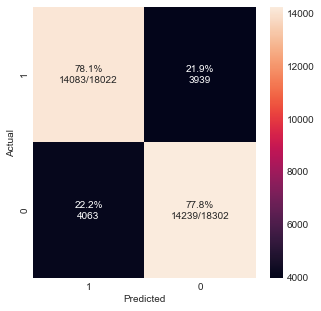

In [105]:
print('Confusion Matrix Plot for Logistic Regression Model\n')
cm_analysis(y_test, predictions, 'confmtrx_LogisticR', labels, ymap=None, figsize=(5,5))

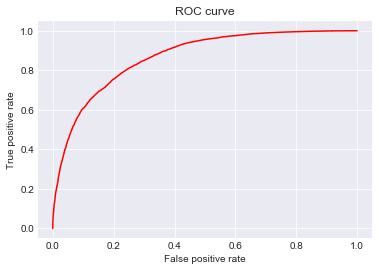

In [96]:
#Plotting the roc_curve for logistic regression
from sklearn.metrics import roc_curve
predi_probability = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test , predi_probability)
plt.plot(fpr,tpr , color = 'red')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

# Decision Tree Model

In [86]:
#Initialising the decision tree classifier

dt = DecisionTreeClassifier()

#Fitting the data
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [87]:
#making predictions
y_pred_dt=dt.predict(X_test)

print ('Performance of Decision Tree Model:\n')

#printing the classification report
print ('Classification Report:\n',sklearn.metrics.classification_report(y_pred_dt , y_test))

#Accuracy ofthe model
print ('\nAccuracy:', sklearn.metrics.accuracy_score(y_pred_dt , y_test))

#Printing the confusion matrix
print ('\nConfusion Matrix:\n',sklearn.metrics.confusion_matrix(y_pred_dt , y_test))

Performance of Decision Tree Model:

Classification Report:
              precision    recall  f1-score   support

          0       0.77      0.78      0.78     17960
          1       0.79      0.77      0.78     18364

avg / total       0.78      0.78      0.78     36324


Accuracy: 0.7778328377931946

Confusion Matrix:
 [[14096  3864]
 [ 4206 14158]]


Confusion Matrix Plot for Decision Tree Model



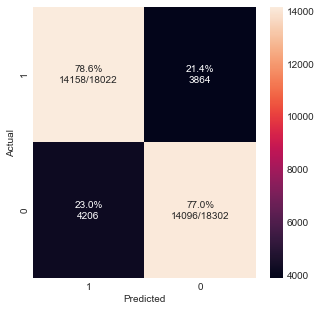

In [104]:
print('Confusion Matrix Plot for Decision Tree Model\n')
cm_analysis(y_test, y_pred_dt, 'confmtrx_DecisionT', labels, ymap=None, figsize=(5,5))

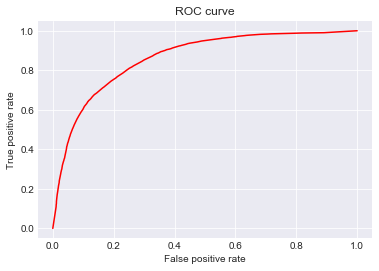

In [93]:
#ROC curve for decision trees
from sklearn.metrics import roc_curve
predi_probability_dt = dt.predict_proba(X_test)[:,1]
fpr2, tpr2, thresholds = roc_curve(y_test , predi_probability_dt)
plt.plot(fpr2,tpr2 , color = 'red')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

# Random Forest Model

In [89]:
#Importing the random forest classifier
from sklearn.ensemble import RandomForestClassifier

#Initialising the random forest classifier
r =  RandomForestClassifier()

#Fitting the data to the random forest classifier
r.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
#Making Predictions
y_rfc_pred = r.predict(X_test)

print ('Performance of Random Forest Model:\n')

#Printing the classification report
import sklearn
print ('Classification Report:\n', sklearn.metrics.classification_report(y_rfc_pred , y_test))

#Accuracy ofthe model
print ('\nAccuracy:', sklearn.metrics.accuracy_score(y_rfc_pred , y_test))

#Printing the confusion matrix
print ('\nConfusion Matrix:\n', sklearn.metrics.confusion_matrix(y_rfc_pred , y_test))

Performance of Random Forest Model:

Classification Report:
              precision    recall  f1-score   support

          0       0.76      0.79      0.78     17693
          1       0.79      0.77      0.78     18631

avg / total       0.78      0.78      0.78     36324


Accuracy: 0.779567228278824

Confusion Matrix:
 [[13994  3699]
 [ 4308 14323]]


Confusion Matrix Plot for Random Forest Model



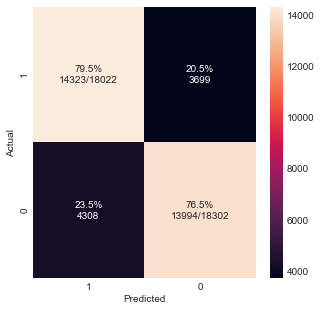

In [103]:
print('Confusion Matrix Plot for Random Forest Model\n')
cm_analysis(y_test, y_rfc_pred, 'confmtrx_RandomF', labels, ymap=None, figsize=(5,5))

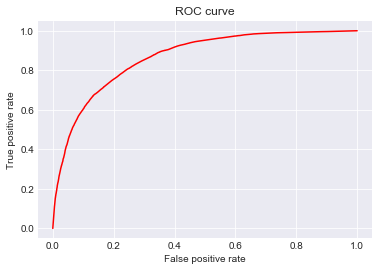

In [91]:
#ROC curve for random forests
from sklearn.metrics import roc_curve
predi_probability_rfc = r.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds = roc_curve(y_test , predi_probability_rfc)
plt.plot(fpr1,tpr1 , color = 'red')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

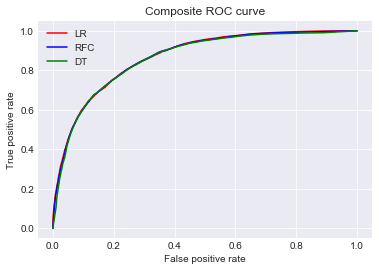

In [98]:
#Composite ROC curve diagram
plt.plot(fpr,tpr , color = 'red', label = "LR")
plt.plot(fpr1,tpr1 , color = 'blue',label = 'RFC')
plt.plot(fpr2,tpr2 , color = 'green',label = 'DT')
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Composite ROC curve')
plt.show()